# WID3002 Neural Computing Assignment 1
## Binary Classification with Perceptron using Stochastic Gradient Descent and Batch/MiniBatch Gradient Descent 
### Lawrence Leroy Chieng Tze Yao (S2018935)

Question: https://github.com/LawrenceLCTY/WID3003-NeuralComputing_2022_2223/blob/main/02_PerceptronAssignment_SGD_and_BGDMiniBGD_question_2022_23.ipynb

### Import Libraries

In [141]:
import numpy as np
import matplotlib.pyplot as plt

### Global Variable Initialisation

In [142]:
np.random.seed(np.random.randint(100))
size = 500
epochs = 5000
alpha = 0.1

### Generate *Training* Dataset

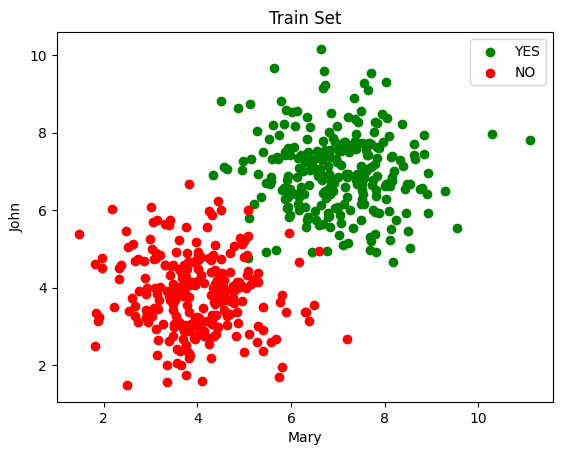

In [143]:
def generate_dataset(size:int):
    size//=2 #split half for yes half for no
    
    #label=YES
    input_yes= np.hstack((np.random.normal(7, 1, (size,2)), np.ones(size).reshape(size, 1)))
    #label=NO
    input_no= np.hstack((np.random.normal(4, 1, (size,2)), np.zeros(size).reshape(size, 1)))

    dataset = np.concatenate((input_yes, input_no))
    
    return dataset

train_set = generate_dataset(size)

#visualising train set
plt.scatter(train_set[:size//2,0], train_set[:size//2,1], color='green')
plt.scatter(train_set[size//2:,0], train_set[size//2:,1], color='red')
plt.legend(['YES', 'NO'])
plt.title('Train Set')
plt.xlabel('Mary')
plt.ylabel('John')
plt.show()

### Utility functions

In [144]:
def summation(weights, bias, input):
    return np.dot(weights, input.T) + bias 

def activation(sumf):
    return 1 / (1+np.exp(-sumf))

def convergence(errors):
    converge_limit = 1/(10**15)
    if len(errors) > 1:
        error = abs(errors[-1] - errors[-2])
        if error < converge_limit:
            print(f'Convergence: step={error}')
            return True
    return False

def plot_error_graph(errors, title=None):
    x_axis = np.linspace(1, len(errors), len(errors))
    plt.plot(x_axis, errors)
    plt.xlabel("epoch")
    plt.ylabel("mean squared error")
    plt.title("Error: "+title)
    plt.show()

def plot_weights_graph(weights, title=None):
    for w in weights:
        x_axis = np.linspace(1, len(w), len(w))
        plt.plot(x_axis, w)
    legends = ['w'+str(i) for i in range(len(weights))]
    plt.legend(legends, loc='lower right')
    plt.xlabel("epoch")
    plt.ylabel("weights")
    plt.title("Weights: "+title)
    plt.show()

def plot_accuracy_graph(accuracy, title=None):
    x_axis = np.linspace(1, len(accuracy), len(accuracy))
    plt.plot(x_axis, accuracy)
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.title("Accuracy: "+title)
    plt.show()

def accuracy_by_class(y_hat, y, title=None):
    count_yes = count_no = 0
    size = len(y)
    for i in range(size):
        if round(y_hat[i]) == y[i] == 1:
            count_yes += 1
        if round(y_hat[i]) == y[i] == 0:
            count_no += 1
    count_yes /= (size/2)
    count_no /= (size/2) 
    print(f'Accuracy by class: {title}\nYES: {count_yes}\nNO: {count_no}')

### **Stochastic gradient descent** (v1)

epoch 1, Error: 0.49797477310024396
epoch 2, Error: 0.49797263342718123
epoch 3, Error: 0.4979643138727439
epoch 4, Error: 0.4979643138772227
epoch 5, Error: 0.4979643138803016
epoch 6, Error: 0.4979224338958245
epoch 7, Error: 0.49791732131432015
epoch 8, Error: 0.4979135821775408
epoch 9, Error: 0.49791358218819876
epoch 10, Error: 0.4979135821915951
epoch 11, Error: 0.4978883812728357
epoch 12, Error: 0.49788838127742846
epoch 13, Error: 0.4978750847026637
epoch 14, Error: 0.49787508470696573
epoch 15, Error: 0.49787508470776837
epoch 16, Error: 0.49787190858996433
epoch 17, Error: 0.4978719085996749
epoch 18, Error: 0.4978719086002997
epoch 19, Error: 0.4978597337379063
epoch 20, Error: 0.497859733744482
epoch 21, Error: 0.4978468682413024
epoch 22, Error: 0.49784686824216623
epoch 23, Error: 0.4978468682447664
epoch 24, Error: 0.4978468682469131
epoch 25, Error: 0.49782173539598934
epoch 26, Error: 0.4978217354120805
epoch 27, Error: 0.4978217354129621
epoch 28, Error: 0.497821736

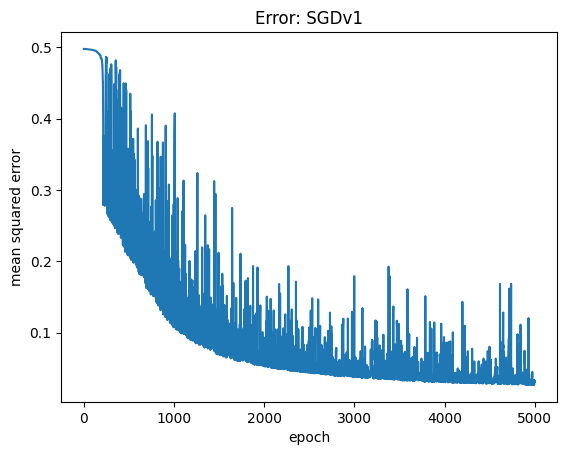

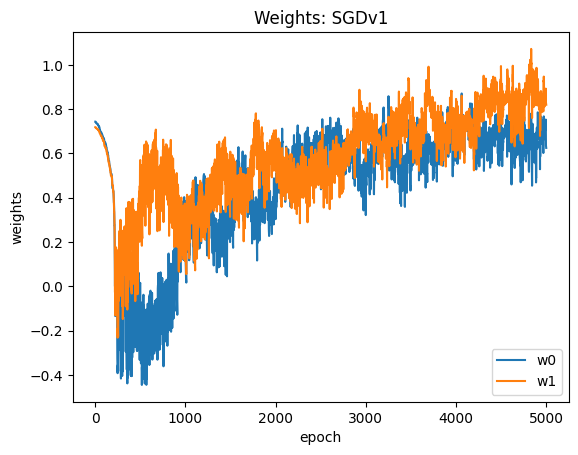

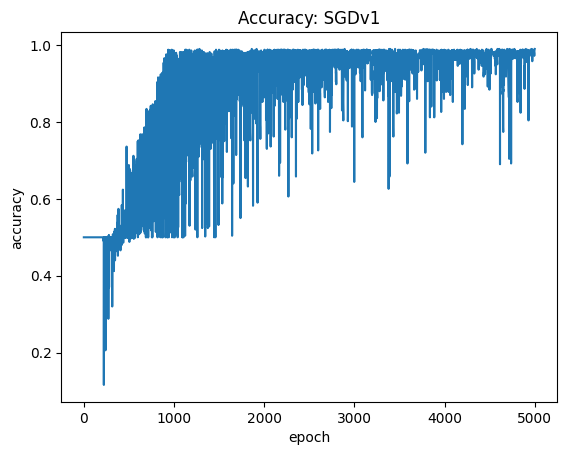

Accuracy by class: SGDv1
YES: 0.98
NO: 1.0


In [145]:
#Stochastic gradient descent v1

def stochastic_gd():
    bias = np.random.rand(1)
    weights = np.random.rand(2)
    errors = []
    accuracy = []
    weights_arr = np.array(weights)
    for i in range(epochs):
        #optional: shuffle train set
        randomised_train_set = np.random.permutation(train_set)
        x_train = randomised_train_set[:, :2]
        y_train = randomised_train_set[:, 2]
        
        #select random data point
        index = np.random.randint(size)
        x = x_train[index]
        y = y_train[index]
        
        #summation & activation functions
        y_hat = activation(summation(weights, bias, x))
        
        #bias update value
        pd_bias = 2 * (y_hat - y) * y_hat * (1 - y_hat) 
        #weights update value
        pd_weights = pd_bias * x
        
        #update values
        bias -= alpha * pd_bias
        weights -= alpha * pd_weights
        
        #test entire dataset
        y_pred = activation(summation(weights, bias, x_train))
        errors.append(np.mean((y_pred-y_train)**2)) #mean squared error
        accuracy.append(np.mean(np.round(y_pred) == y_train))
        weights_arr = np.column_stack((weights_arr, weights))
                
        print(f'epoch {i+1}, Error: {errors[-1]}')
        if convergence(errors):
            break
        
    plot_error_graph(errors, "SGDv1")
    plot_weights_graph(weights_arr, "SGDv1")
    plot_accuracy_graph(accuracy, "SGDv1")
    accuracy_by_class(y_pred, y_train, "SGDv1")
        
    return weights, bias

sgd_weights, sgd_bias = stochastic_gd()

### **Batch gradient descent**

epoch 1, Error: 0.4941863610306519
epoch 2, Error: 0.47735703106237126
epoch 3, Error: 0.4153011420563325
epoch 4, Error: 0.2778335588635339
epoch 5, Error: 0.24471332839658103
epoch 6, Error: 0.2435888097649909
epoch 7, Error: 0.24131402966441404
epoch 8, Error: 0.24081732544281367
epoch 9, Error: 0.23975658604589467
epoch 10, Error: 0.23906865912072583
epoch 11, Error: 0.23821464046394805
epoch 12, Error: 0.23745504116863003
epoch 13, Error: 0.23665290237341263
epoch 14, Error: 0.23587712206316291
epoch 15, Error: 0.2350923870192313
epoch 16, Error: 0.23431656946751614
epoch 17, Error: 0.23354059071172859
epoch 18, Error: 0.23276903399607768
epoch 19, Error: 0.23199957970032875
epoch 20, Error: 0.23123339073019508
epoch 21, Error: 0.23046987702918603
epoch 22, Error: 0.22970932912095185
epoch 23, Error: 0.22895159597898826
epoch 24, Error: 0.2281967474150855
epoch 25, Error: 0.22744474287871327
epoch 26, Error: 0.22669559672373482
epoch 27, Error: 0.22594929590194218
epoch 28, Error:

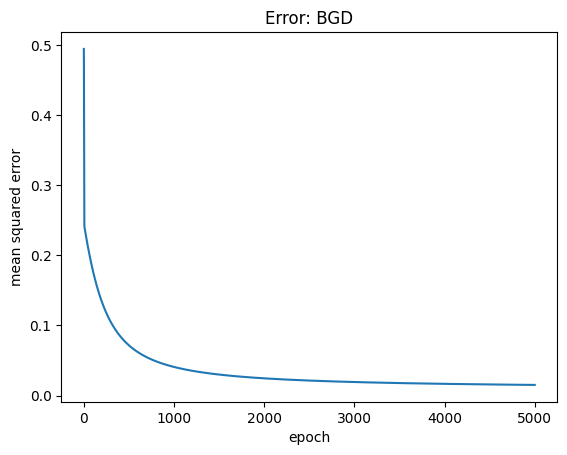

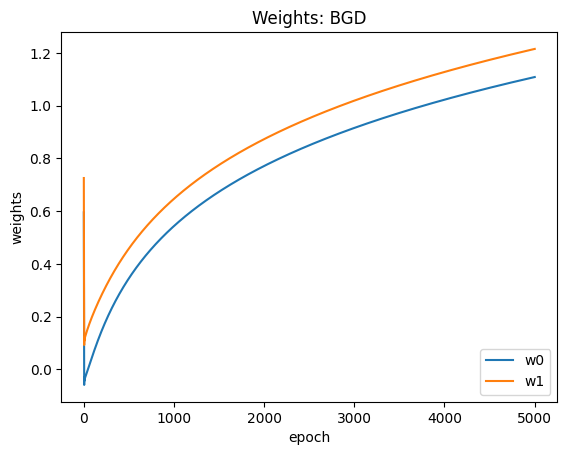

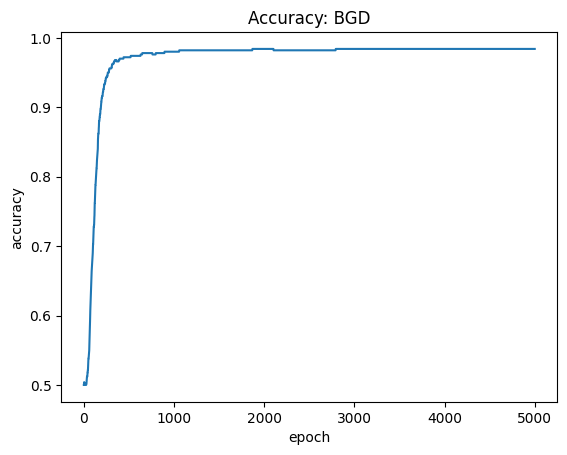

Accuracy by class: BGD
YES: 0.988
NO: 0.98


In [146]:
#Full Batch gradient descent

def batch_gd():
    bias = np.random.rand(1)
    weights = np.random.rand(2)
    errors = []
    accuracy = []
    weights_arr = np.array(weights)
    
    for i in range(epochs):
        randomised_train_set = np.random.permutation(train_set)
        x_train = randomised_train_set[:, :2]
        y_train = randomised_train_set[:, 2]

        #summation & activation function
        y_pred = activation(summation(weights, bias, x_train)) 
        
        #bias update value
        pd_bias = np.sum(y_pred - y_train) / size
        #weights update value
        pd_weights = np.dot(x_train.T, (y_pred - y_train)) / size
               
        #update values
        bias -= alpha * pd_bias
        weights -= alpha * pd_weights
        
        errors.append(np.mean((y_pred-y_train)**2)) #mean squared error
        accuracy.append(np.mean(np.round(y_pred) == y_train))
        weights_arr = np.column_stack((weights_arr, weights))
                
        print(f'epoch {i+1}, Error: {errors[-1]}')
        if convergence(errors):
            break
        
    plot_error_graph(errors, "BGD")
    plot_weights_graph(weights_arr, "BGD")
    plot_accuracy_graph(accuracy, "BGD")
    accuracy_by_class(y_pred, y_train, "BGD")
    
    return weights, bias

bgd_weights, bgd_bias = batch_gd()

### Plot Decision Line

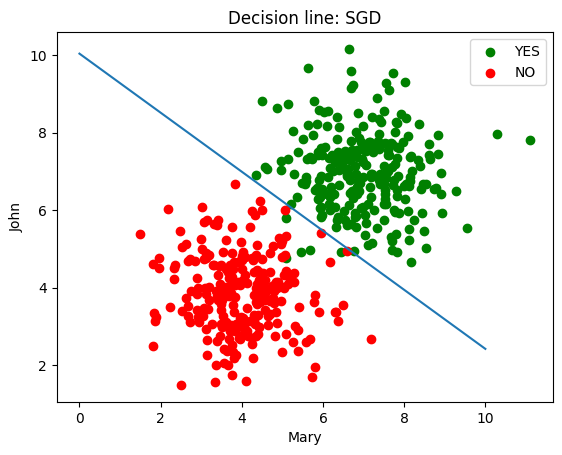

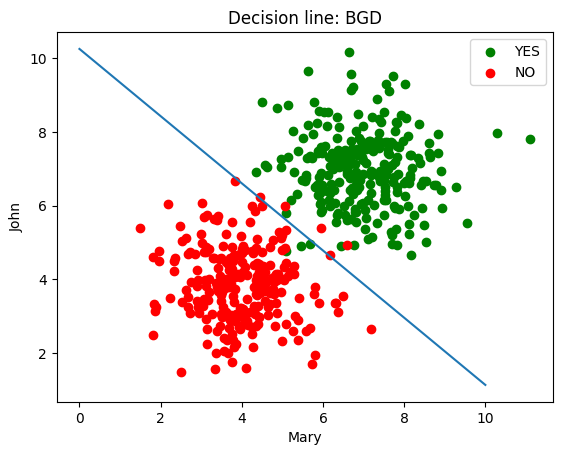

In [147]:
def plot_decision_line(weights, bias, dataset, title=None):
    data_size = len(dataset)
    
    #plot YES and NO points
    plt.scatter(dataset[:data_size//2,0], dataset[:data_size//2,1], color='green', label='YES')
    plt.scatter(dataset[data_size//2:,0], dataset[data_size//2:,1], color='red', label='NO')
    plt.legend(['YES','NO'])
    
    #plot decision line
    w0 = weights[0]
    w1 = weights[1]
    x = np.linspace(0, 10, 300)
    y = (-w0 * x - bias) / w1
    plt.plot(x, y, label=title)
    
    plt.title(f'Decision line: {title}')
    plt.xlabel('Mary')
    plt.ylabel('John')
    plt.show()
    
plot_decision_line(sgd_weights, sgd_bias, train_set, "SGD")
plot_decision_line(bgd_weights, bgd_bias, train_set, "BGD")

### Plot 3d Grid

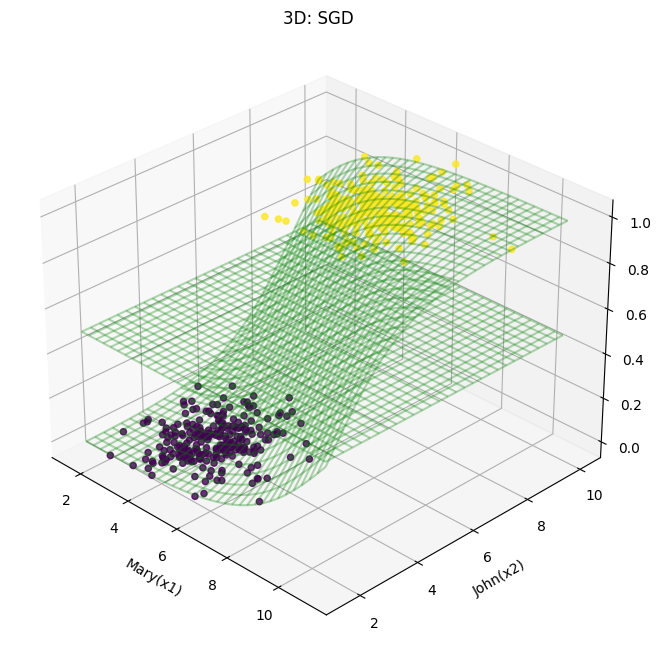

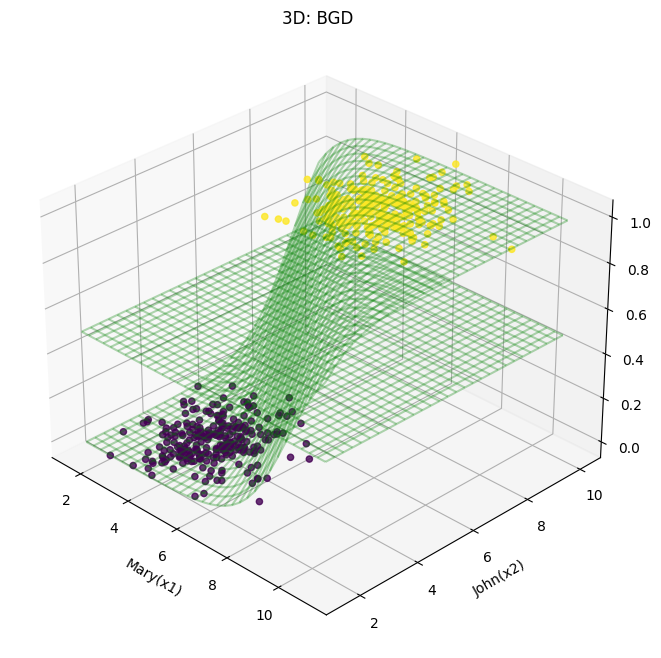

In [148]:
def plot_3d(weights, bias, title=None):
    x = train_set[:, :2]
    y = train_set[:, 2]
    x_coords = x[:, 0]
    y_coords = x[:, 1]
    
    #initialise 3d plot
    fig = plt.figure(figsize=(8,8))
    proj = fig.add_subplot(projection='3d')
    proj.scatter3D(x[:,0], x[:,1], y, c=y, alpha=0.8) 
    proj.view_init(elev=30, azim=-45)
    
    #plot meshgrids
    x_surface = np.arange(x_coords.min(), x_coords.max(), 0.3) 
    y_surface = np.arange(y_coords.min(), y_coords.max(), 0.3)
    x_surface, y_surface = np.meshgrid(x_surface, y_surface)
    
    
    #plot decision plane
    z = activation(summation(weights, bias, np.c_[x_surface.ravel(), y_surface.ravel()]))
    proj.plot_wireframe(x_surface, y_surface, z.reshape(x_surface.shape), color='green', alpha=0.3) 
        
    #plot YES-NO seperator
    seperator = np.repeat(0.5, len(z))
    proj.plot_wireframe(x_surface, y_surface, seperator.reshape(x_surface.shape), color='green', alpha=0.3) 
    plt.title(f"3D: {title}")
    plt.xlabel('Mary(x1)')
    plt.ylabel('John(x2)')
    plt.show()

plot_3d(sgd_weights, sgd_bias, "SGD")
plot_3d(bgd_weights, bgd_bias, "BGD")


### Generate *Test* Dataset

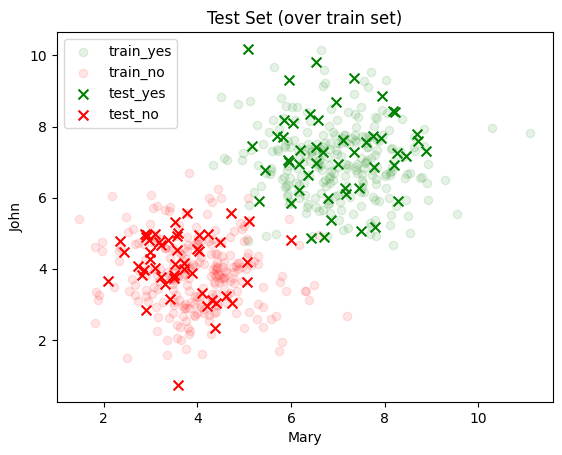

In [149]:
test_size = size//5
test_set = generate_dataset(test_size)
plt.scatter(train_set[:size//2,0], train_set[:size//2,1], color='green', alpha=0.1)
plt.scatter(train_set[size//2:,0], train_set[size//2:,1], color='red', alpha=0.1)
plt.scatter(test_set[:test_size//2,0], test_set[:test_size//2,1], s=50, color='green', marker='x')
plt.scatter(test_set[test_size//2:,0], test_set[test_size//2:,1], s=50, color='red', marker='x')
plt.legend(['train_yes', 'train_no', 'test_yes', 'test_no'])
plt.title('Test Set (over train set)')
plt.xlabel('Mary')
plt.ylabel('John')
plt.show()

### Test Data Accuracy

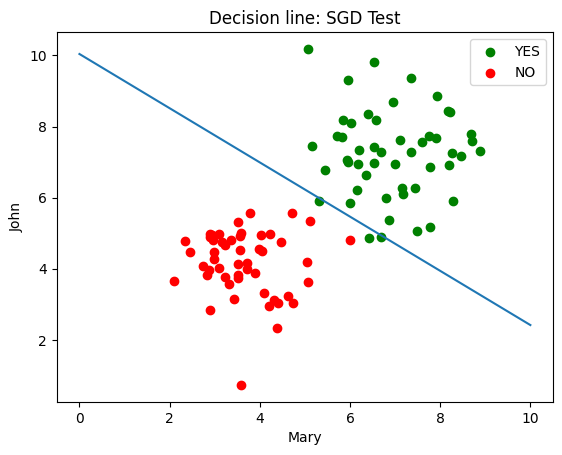

Accuracy by class: SGD Test
YES: 0.94
NO: 1.0


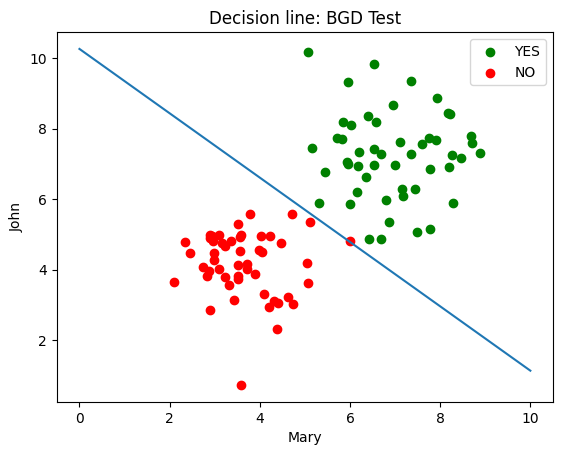

Accuracy by class: BGD Test
YES: 1.0
NO: 0.98


In [150]:
x_test = test_set[:, :2]
y_test = test_set[:, 2]

sgd_y_hat = activation(summation(sgd_weights, sgd_bias, x_test))
bgd_y_hat = activation(summation(bgd_weights, bgd_bias, x_test))

plot_decision_line(sgd_weights, sgd_bias, test_set, "SGD Test")
accuracy_by_class(sgd_y_hat, y_test, "SGD Test")
plot_decision_line(bgd_weights, bgd_bias, test_set, "BGD Test")
accuracy_by_class(bgd_y_hat, y_test, "BGD Test")

### Questions to ponder upon


Q1.   Which one is 'smoother' and why is that?
>A1. Batch Gradient Descent; the gradient computed using the entire dataset is often a more accurate estimate to the true gradient value. This leads to a smoother convergence path with more consistent updates towards the (hopefully global) minimum.

Q2.   Which one converges faster and why is that?
>A2. Stochastic Gradient Descent; parameters are updated every time a random sample is selected from the training set. More frequent updates allow the algorithm to converge more quickly.


Q3.   What happens to the weights as the algorithm converges?
>A3. Gradient Descent aims to lead the weights to their optimal values. Value updates will be larger in early iterations compared to later as the gradient gradually decreases over each iteration. When the updates become negligibly small, the algorithm is said to achieve convergence, and the weights have reached their optimal point. 


Q4.   What is the difference between SGD, BGD and Mini BGD?
>A4. As the name implies, Stochastic means *randomly selected* and Batch refers to *the entire dataset*. SGD updates gradient values after calculating error using a **single** (random) data point, BGD only does this after getting the cumulative error of the **entire training set**. \
MiniBatch is an attempt to get the best of both sides by using a small portion of the dataset for each gradient update, hoping to gain faster convergence like SGD and smoother fluctuations like BGD. 
